In [ ]:
""" Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link
Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.
Q2. Split the dataset into a training set (70%) and a test set (30%).
Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.
Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.
Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.
Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.
Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.
Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk. """

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.target.unique()

array([1, 0])

In [6]:
X=df.drop(df[["target"]], axis=1)

In [7]:
y=df.target

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
clf=RandomForestClassifier(n_estimators=100, max_depth=10)

In [12]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [13]:
y_pred=clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, classification_report

In [15]:
accuracy_score(y_test, y_pred)

0.8021978021978022

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

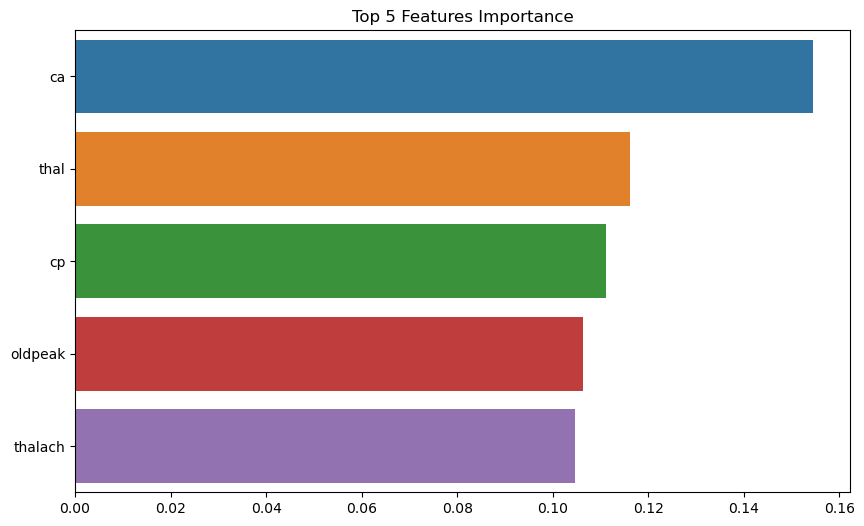

In [18]:
feature_importances = clf.feature_importances_
top_features_idx = feature_importances.argsort()[-5:][::-1]  # Indices of top 5 features
top_features = X.columns[top_features_idx]

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[top_features_idx], y=top_features)
plt.title('Top 5 Features Importance')
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
params={"n_estimators":[10,50,100],
        "max_depth":[1,2,5],
        "min_samples_split":[1,2,3],
        "min_samples_leaf":[1,2,3]}

In [21]:
grid=GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5)

In [22]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [10, 50, 100]})

In [23]:
grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 10}

In [24]:
y_pred=grid.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.8131868131868132

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.78        41
           1       0.81      0.86      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



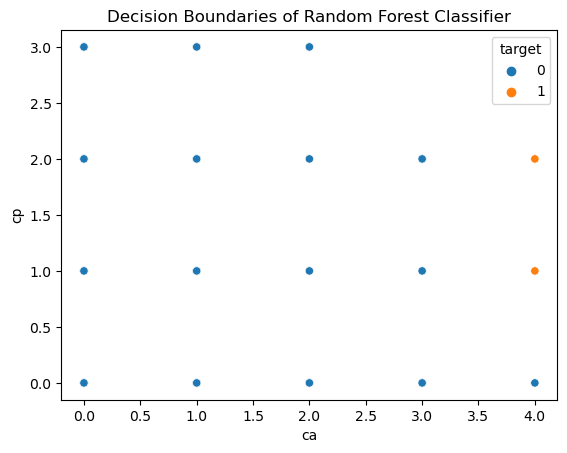

In [27]:
sns.scatterplot(x="ca", y="cp", hue="target", data=df)
plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()